# 1.Airport

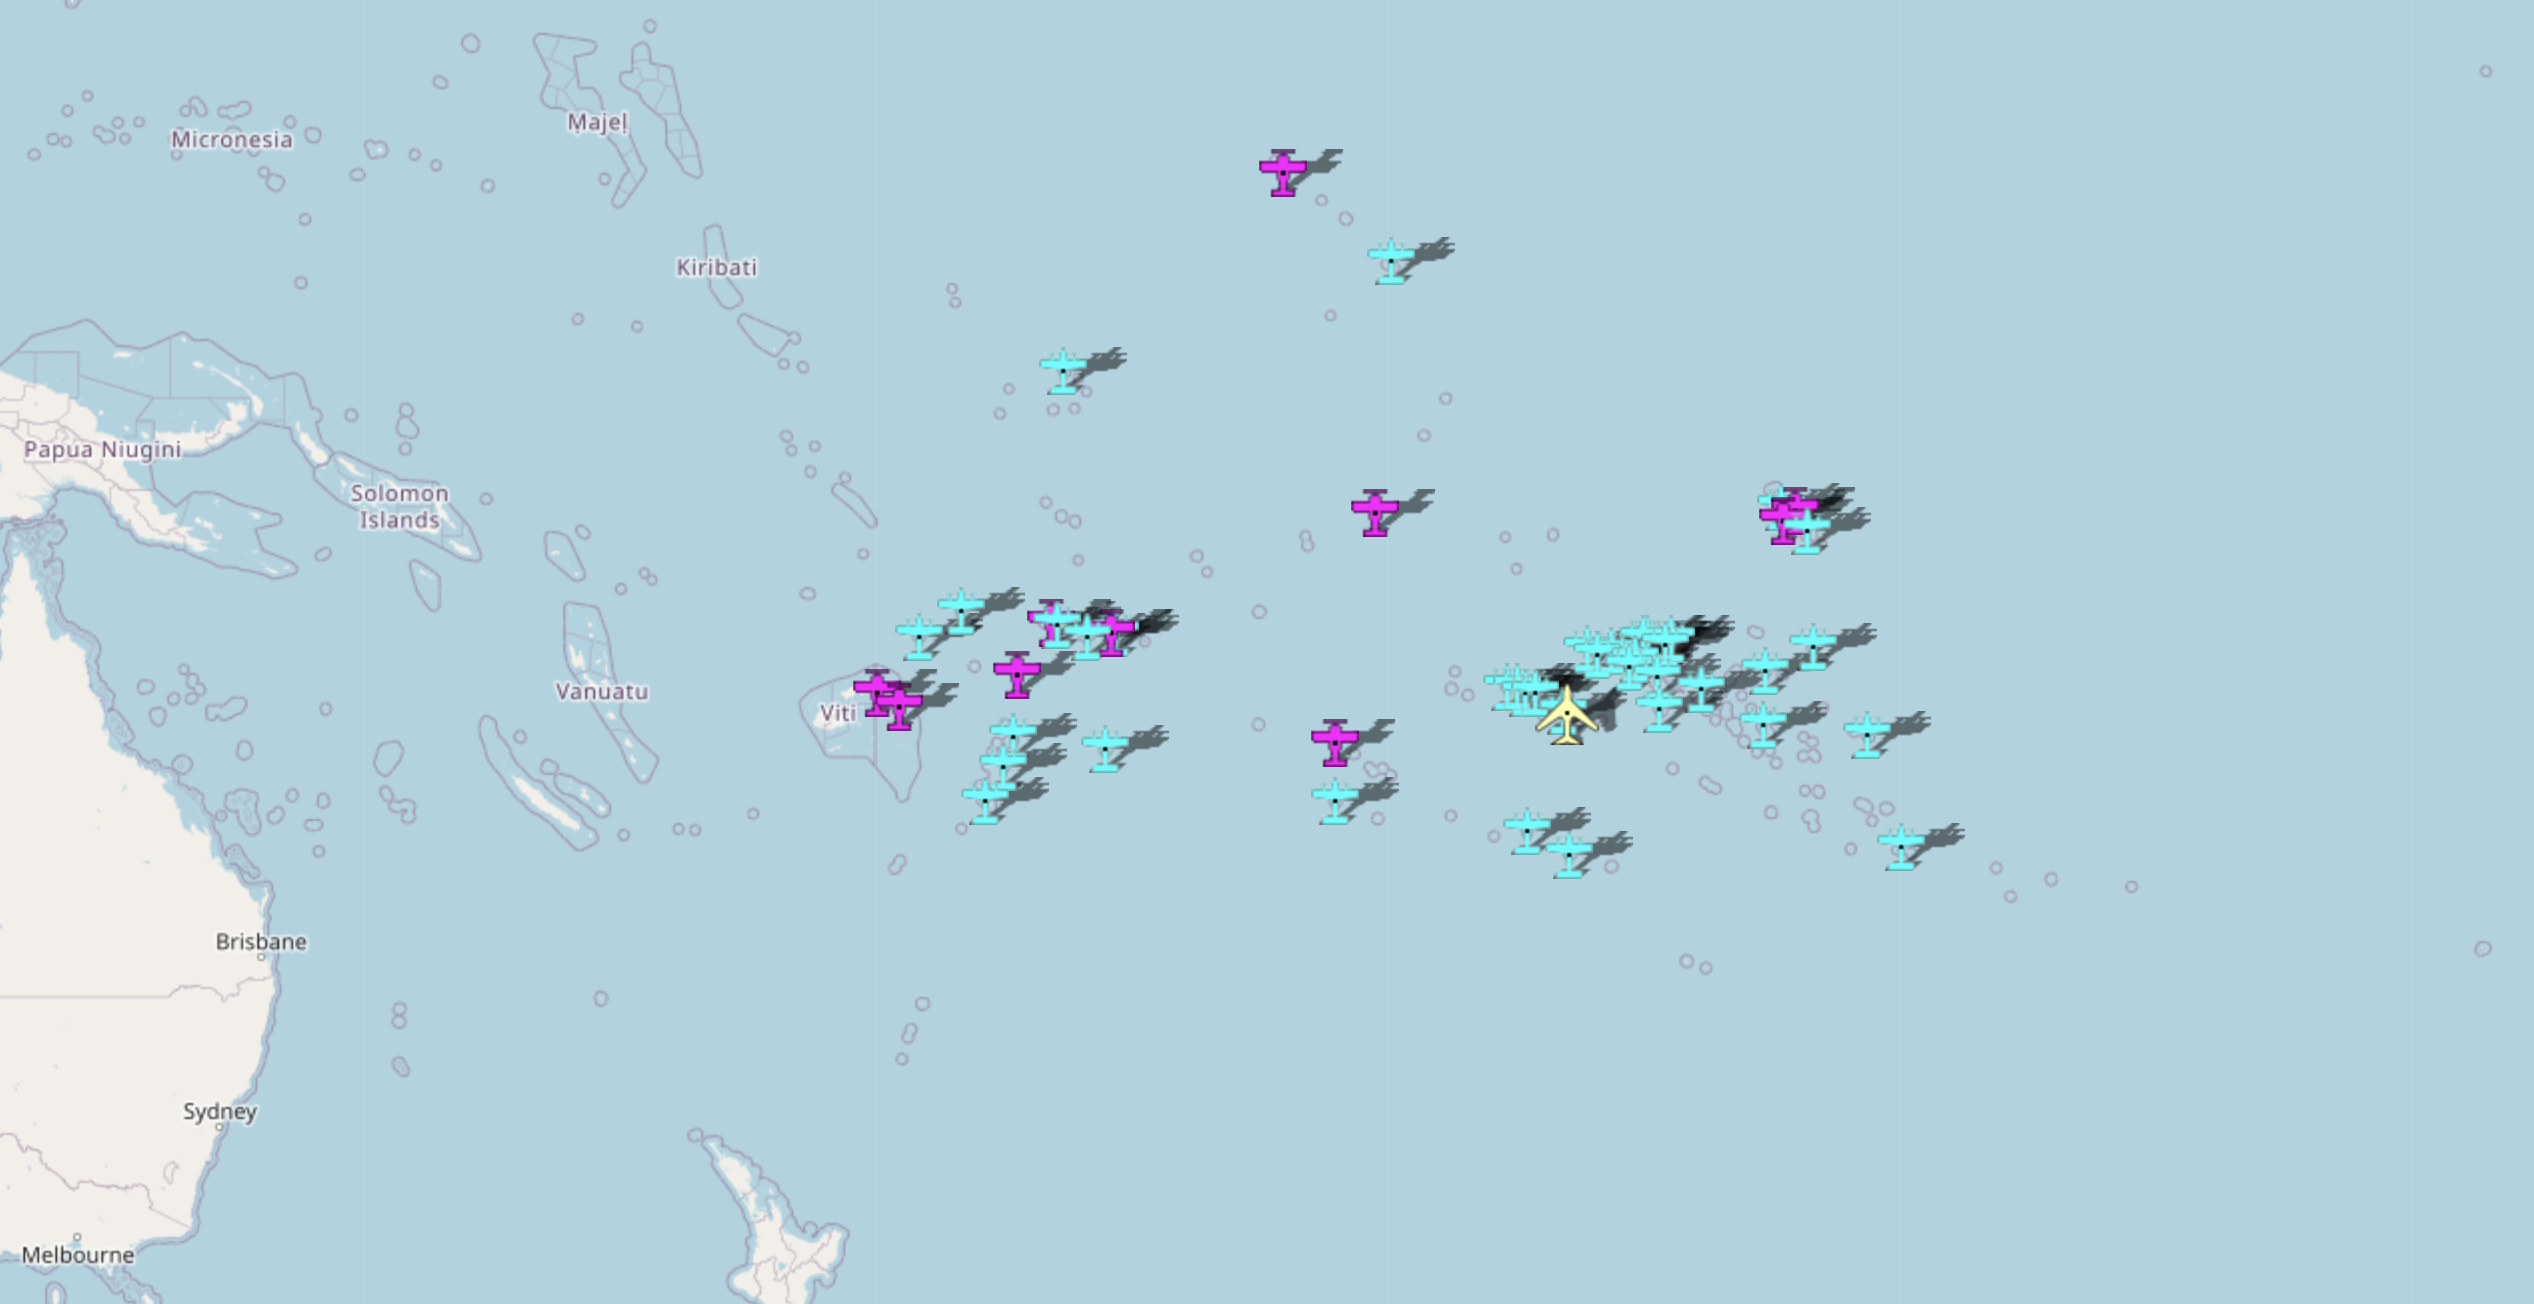

https://ourairports.com/continents/OC/

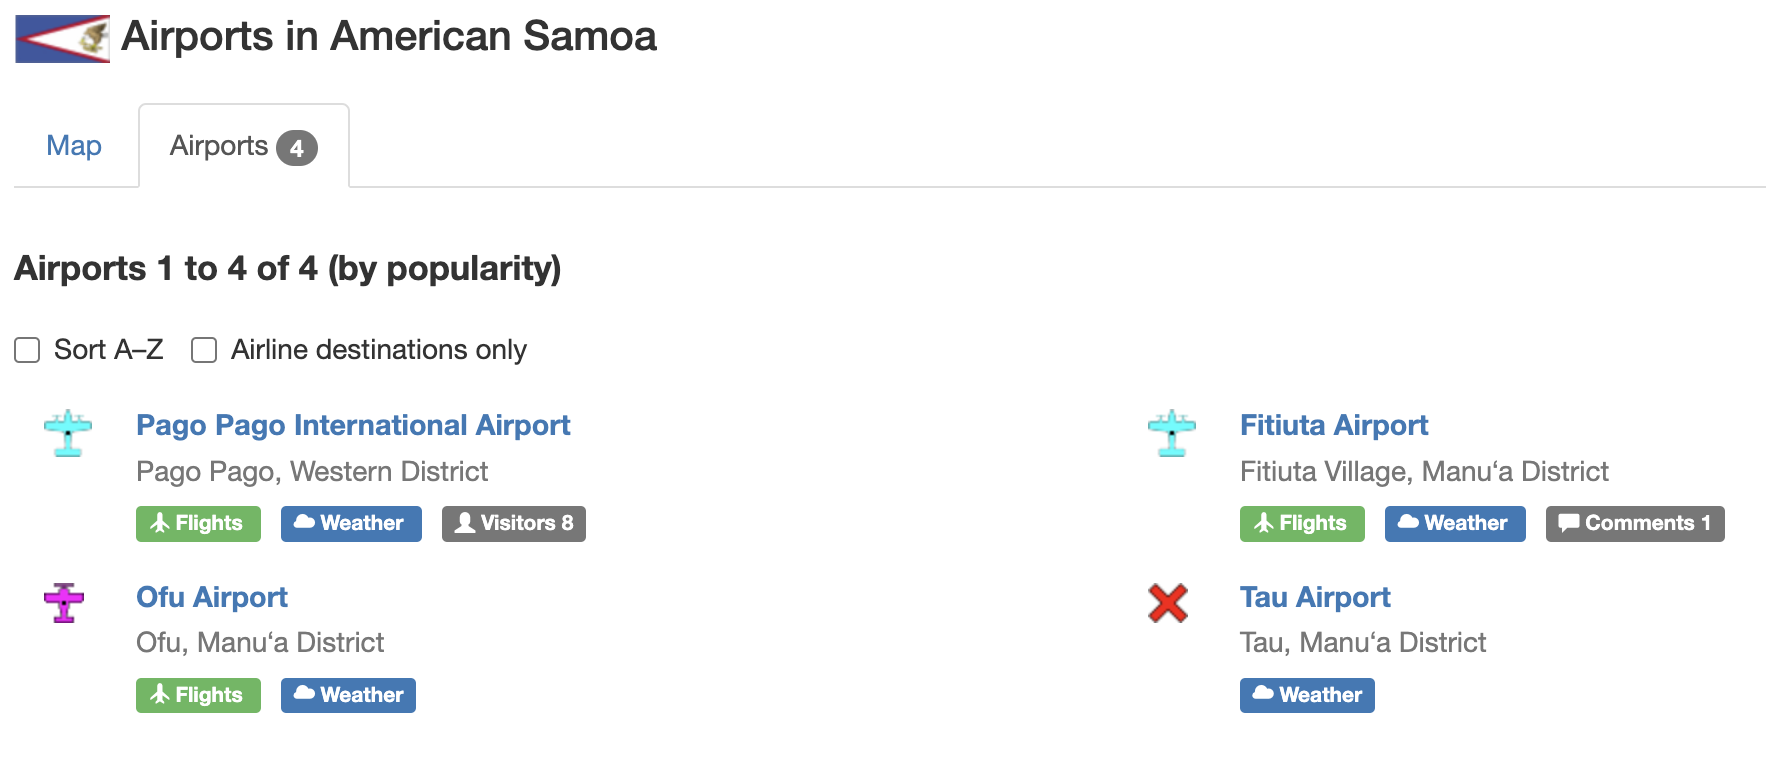

In [60]:
import pandas as pd
import re
airports = pd.read_csv("world-airports.csv")
iata_code = airports["iata_code"].unique().tolist()
pacific_islands = ['American Samoa', 'Cook Islands', 'French Polynesia', 'Niue', 'Samoa', 'Tokelau', 'Tonga', 'Tuvalu', 'Wallis and Futuna', 'Fiji', 'Papua New Guinea', 'Solomon Islands', 'Vanuatu', 'New Caledonia', 'West Papua', 'Bougainville', 'Federated States of Micronesia', 'Palau', 'Marshall Islands', 'Guam', 'Northern Mariana Islands', 'Nauru', 'Kiribati', 'Wake Island', 'Johnston Atoll']
# Recognition pattern
pattern = re.compile(r'|'.join(map(re.escape, pacific_islands)), re.IGNORECASE)
# Match name
matching_rows = airports[airports['country_name'].str.match(pattern)]
# Select cols
important_columns = ['type', 'name', 'country_name','iata_code','municipality']
df_filtered = matching_rows[important_columns]
sorted_df = df_filtered.sort_values(by="country_name").reset_index(drop=True)
iata_code = sorted_df["iata_code"].unique().tolist()
print(sorted_df)

               type                             name       country_name  \
0    medium_airport                  Fitiuta Airport     American Samoa   
1     small_airport                      Ofu Airport     American Samoa   
2    medium_airport  Pago Pago International Airport     American Samoa   
3     small_airport           Mangaia Island Airport       Cook Islands   
4     small_airport                Tongareva Airport       Cook Islands   
..              ...                              ...                ...   
556          closed              Luganville Airfield            Vanuatu   
557   small_airport                    Ipota Airport            Vanuatu   
558   small_airport              Maewo-Naone Airport            Vanuatu   
559  medium_airport              Pointe Vele Airport  Wallis and Futuna   
560  medium_airport                   Hihifo Airport  Wallis and Futuna   

    iata_code        municipality  
0         FTI     Fitiuta Village  
1         OFU              

In [46]:
#  groupby iata_code
grouped = sorted_df.groupby('country_name')['iata_code'].apply(list).reset_index()

# iata_code dict
country_iata_dict = dict(zip(grouped['country_name'], grouped['iata_code']))

# print iata_code 
for country, iata_codes in country_iata_dict.items():
    print(f"Country: {country}, IATA Codes: {iata_codes}")


Country: American Samoa, IATA Codes: ['FTI', 'OFU', 'PPG']
Country: Cook Islands, IATA Codes: ['MGS', 'PYE', 'MOI', 'MUK', 'RAR', 'MHX', 'AIT', 'AIU', 'PZK', nan]
Country: Fiji, IATA Codes: ['NGI', 'MFJ', 'NAN', 'VBV', 'SVU', 'RTA', 'LKB', 'KXF', 'MNF', 'ICI', 'LBS', 'LUC', 'KDV', 'TVU', 'SUV', 'LEV', 'ONU', nan, 'PTF', nan, 'CST', nan]
Country: French Polynesia, IATA Codes: ['PKP', 'UAH', 'AAA', 'KXU', 'KHZ', 'UAP', 'MVT', 'GMR', nan, 'FGU', 'MKP', 'MAU', 'TUB', 'RUR', 'AHE', 'KKR', 'TTI', 'HOI', 'TIH', 'XMH', 'TKP', 'REA', 'TKX', 'AXR', 'FAV', 'RMT', 'HUH', 'FHZ', 'APK', 'RFP', 'MOZ', 'FAC', 'RKA', nan, 'BOB', 'RGI', 'RVV', 'HHZ', 'AUQ', 'NHV', 'PPT']
Country: Guam, IATA Codes: ['GUM', 'UAM', nan]
Country: Kiribati, IATA Codes: ['CIS', 'TSU', 'TRW', 'TNV', 'ABF', 'MTK', 'BBG', nan, 'KUC', 'BEZ', 'AEA', 'AIS', 'CXI', 'TBF', 'AAK']
Country: Marshall Islands, IATA Codes: ['IMI', 'TIC', 'EBN', 'JEJ', 'TBV', 'BII', 'UIT', 'KBT', 'KIO', 'LIK', 'MAV', 'MJB', 'MIJ', 'NDK', 'RNP', 'UJE', 'WTO

# 2.train stations and ferry terminals

In [20]:
import pandas as pd
import re

column_names = ["ID", "Name", "City", "Country", "IATA", "ICAO", "Latitude", "Longitude", "Altitude", "Timezone", "DST", "Tz database time zone", "Type", "Source"]
airports = pd.read_csv("airports-extended.dat",names=column_names, quotechar='"', skipinitialspace=True)
pacific_islands = ['American Samoa', 'Cook Islands', 'French Polynesia', 'Niue', 'Samoa', 'Tokelau', 'Tonga', 'Tuvalu', 'Wallis and Futuna', 'Fiji', 'Papua New Guinea', 'Solomon Islands', 'Vanuatu', 'New Caledonia', 'West Papua', 'Bougainville', 'Federated States of Micronesia', 'Palau', 'Marshall Islands', 'Guam', 'Northern Mariana Islands', 'Nauru', 'Kiribati', 'Wake Island', 'Johnston Atoll']
# Recognition pattern
pattern = re.compile(r'|'.join(map(re.escape, pacific_islands)), re.IGNORECASE)
# Match name
matching_rows = airports[airports['Country'].str.match(pattern)]
# Select cols
important_columns = ["Name", "City", "Country","Type"]
df_filtered = matching_rows[important_columns]
sorted_df = df_filtered.sort_values(by="Type").reset_index(drop=True)
# 
print(sorted_df)

                            Name          City           Country     Type
0             Rimatara roadstead      Rimatara  French Polynesia       \N
1           Gare Martime Papeete       Papeete  French Polynesia       \N
2    Gare Maritime Moorea Vaiare        Moorea  French Polynesia       \N
3                   Ta'u Airport          Ta'u    American Samoa       \N
4                  Rapa Iti port      Rapa Iti  French Polynesia       \N
..                           ...           ...               ...      ...
287              Angaur Airstrip        Angaur             Palau  unknown
288             Peleliu Airfield       Peleliu             Palau  unknown
289                      Bellona       Bellona   Solomon Islands  unknown
290                        ROCKI         Koror             Palau  unknown
291                Enyu Airfield  Bikini Atoll  Marshall Islands  unknown

[292 rows x 4 columns]


# 3.Airlines

In [39]:
column_names = ['Airline', 'Airline ID', 'Source airport', 'Source airport ID', 'Destination airport', 'Destination airport ID', 'Codeshare', 'Stops', 'Equipment']

airlines = pd.read_csv("airlines.dat", names=column_names, quotechar='"', skipinitialspace=True)

# clear data，replace '\N' into NaN
airlines.replace("\\N", pd.NA, inplace=True)

#get code
filtered_iata_code = [code for code in iata_code if isinstance(code, str)]

# 
rec = re.compile(r'|'.join(map(re.escape, filtered_iata_code)), re.IGNORECASE)

# 
in_airlines = airlines[airlines['Destination airport'].str.match(rec, na=False)]  #  NaN 
out_airlines = airlines[airlines['Source airport'].str.match(rec, na=False)]  #  NaN 
print(in_airlines)
print(out_airlines)

      Airline                  Airline ID     Source airport  \
13         13            Ansett Australia               <NA>   
23         23           Alaska Island Air               <NA>   
30         30     Australia Asia Airlines               <NA>   
40         40                   Aerial Oy               <NA>   
70         70     Air Atlantic Dominicana               <NA>   
...       ...                         ...                ...   
5987    19244     Golden Myanmar Airlines                NaN   
6021    19674           Rainbow Air (RAI)  Rainbow Air (RAI)   
6049    19845        FTI Fluggesellschaft                NaN   
6081    20160                City Airways                NaN   
6122    20725  Boliviana de Aviacion (OB)                BoA   

     Source airport ID Destination airport Destination airport ID  \
13                  AN                 AAA                 ANSETT   
23                 NaN                 AAK          ALASKA ISLAND   
30                 NaN  

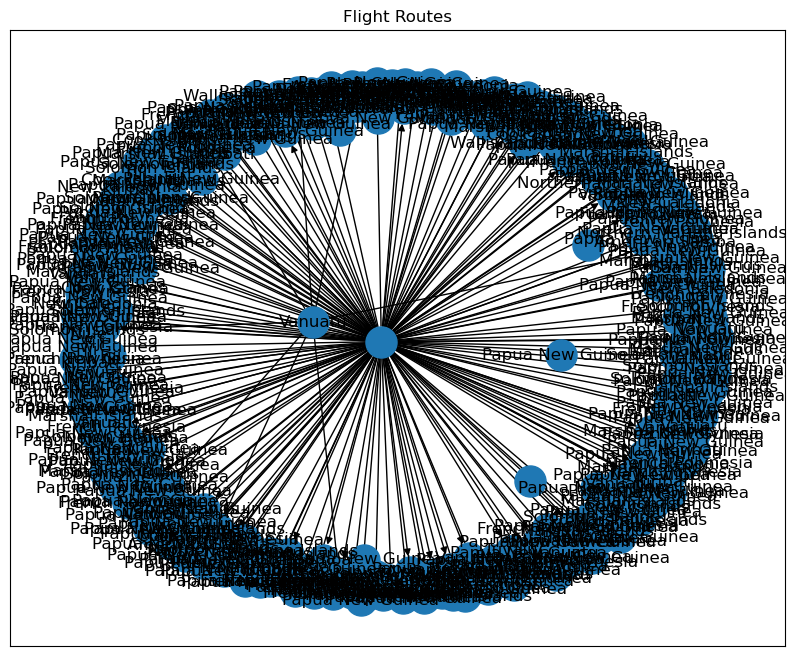

In [56]:
import networkx as nx
import matplotlib.pyplot as plt

# graph
G = nx.DiGraph()

# 
for country, iata_codes in country_iata_dict.items():
    for iata_code in iata_codes:
        G.add_node(iata_code, country=country)  # 

# 
for _, row in in_airlines.iterrows():
    G.add_edge(row['Source airport'], row['Destination airport'])

# 
def draw_graph(G, pos):
    plt.figure(figsize=(10, 8))  # 
    nx.draw_networkx(G, pos, with_labels=True, node_size=500, labels=nx.get_node_attributes(G, 'country'))
    plt.title("Flight Routes")

# 
pos = nx.spring_layout(G, seed=42)

# 
draw_graph(G, pos)
plt.show()



In [54]:
print(country_iata_dict)

{'American Samoa': ['FTI', 'OFU', 'PPG'], 'Cook Islands': ['MGS', 'PYE', 'MOI', 'MUK', 'RAR', 'MHX', 'AIT', 'AIU', 'PZK', nan], 'Fiji': ['NGI', 'MFJ', 'NAN', 'VBV', 'SVU', 'RTA', 'LKB', 'KXF', 'MNF', 'ICI', 'LBS', 'LUC', 'KDV', 'TVU', 'SUV', 'LEV', 'ONU', nan, 'PTF', nan, 'CST', nan], 'French Polynesia': ['PKP', 'UAH', 'AAA', 'KXU', 'KHZ', 'UAP', 'MVT', 'GMR', nan, 'FGU', 'MKP', 'MAU', 'TUB', 'RUR', 'AHE', 'KKR', 'TTI', 'HOI', 'TIH', 'XMH', 'TKP', 'REA', 'TKX', 'AXR', 'FAV', 'RMT', 'HUH', 'FHZ', 'APK', 'RFP', 'MOZ', 'FAC', 'RKA', nan, 'BOB', 'RGI', 'RVV', 'HHZ', 'AUQ', 'NHV', 'PPT'], 'Guam': ['GUM', 'UAM', nan], 'Kiribati': ['CIS', 'TSU', 'TRW', 'TNV', 'ABF', 'MTK', 'BBG', nan, 'KUC', 'BEZ', 'AEA', 'AIS', 'CXI', 'TBF', 'AAK'], 'Marshall Islands': ['IMI', 'TIC', 'EBN', 'JEJ', 'TBV', 'BII', 'UIT', 'KBT', 'KIO', 'LIK', 'MAV', 'MJB', 'MIJ', 'NDK', 'RNP', 'UJE', 'WTO', 'WTE', 'AIC', 'EJT', 'EBO', 'AUL', 'JAT', 'LML', 'ENT', 'WJA', 'UTK', 'MJE', nan, 'AIM', 'MAJ', 'KWA'], 'Nauru': ['INU'], '

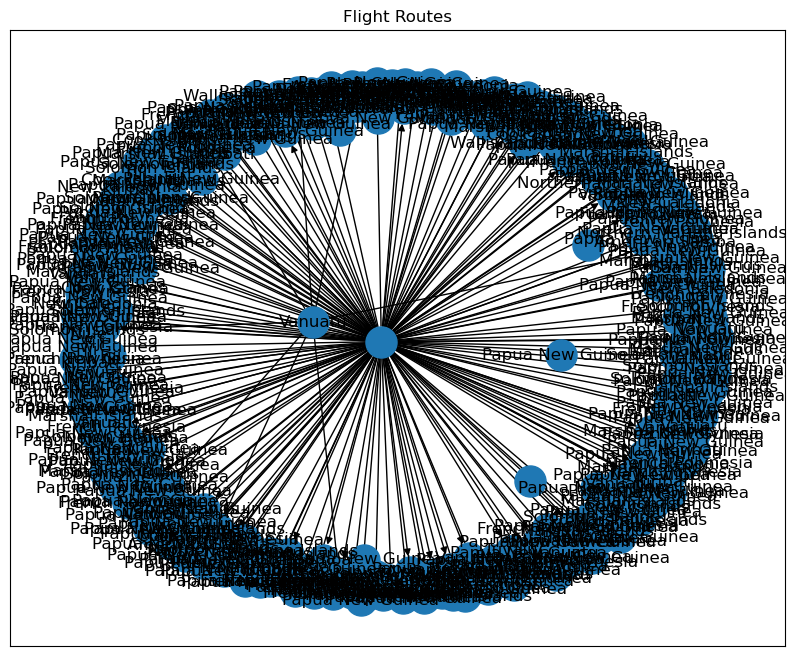

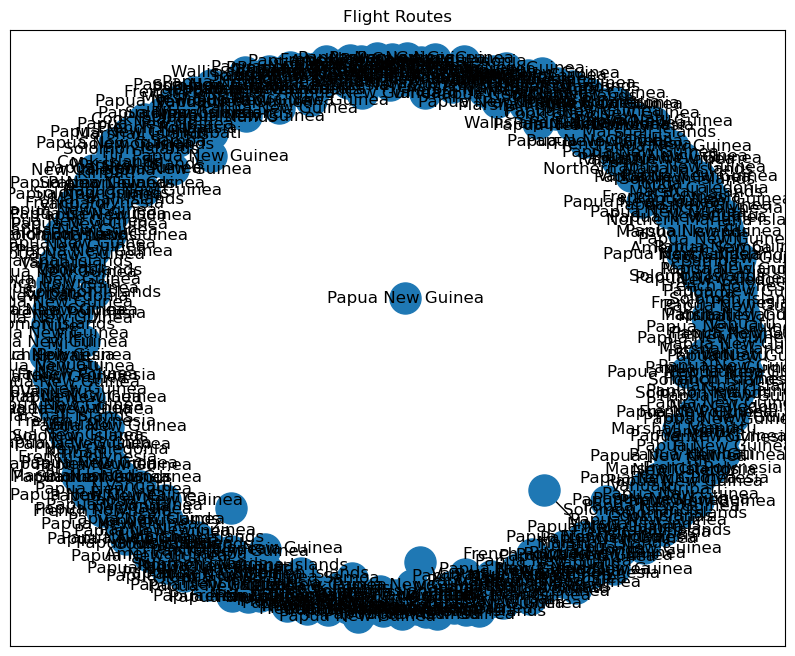

In [57]:
import networkx as nx
import matplotlib.pyplot as plt

# in
G_in = nx.DiGraph()

# 
for country, iata_codes in country_iata_dict.items():
    for iata_code in iata_codes:
        G_in.add_node(iata_code, country=country)  # 

# in
for _, row in in_airlines.iterrows():
    G_in.add_edge(row['Source airport'], row['Destination airport'])

# （out
G_out = nx.DiGraph()

# 
for country, iata_codes in country_iata_dict.items():
    for iata_code in iata_codes:
        G_out.add_node(iata_code, country=country)  # 

# 
for _, row in out_airlines.iterrows():
    G_out.add_edge(row['Source airport'], row['Destination airport'])

# 
def draw_graph(G, pos):
    plt.figure(figsize=(10, 8))  # 
    nx.draw_networkx(G, pos, with_labels=True, node_size=500, labels=nx.get_node_attributes(G, 'country'))
    plt.title("Flight Routes")

# 
pos_in = nx.spring_layout(G_in, seed=42)
pos_out = nx.spring_layout(G_out, seed=42)

# 
draw_graph(G_in, pos_in)
plt.show()

# 
draw_graph(G_out, pos_out)
plt.show()


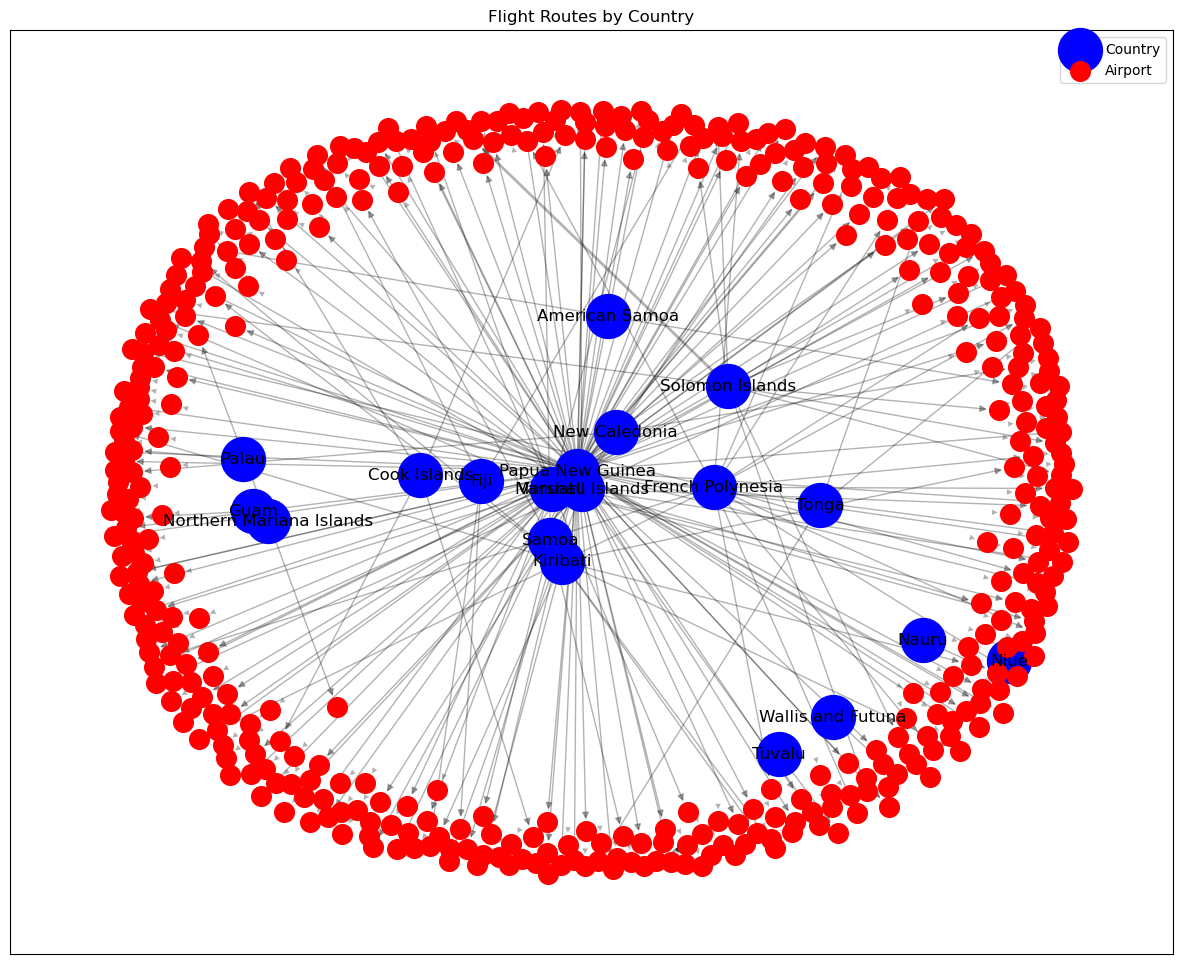

In [62]:
import networkx as nx
import matplotlib.pyplot as plt

# 
G = nx.MultiDiGraph()

#  groupby
airport_connections = in_airlines.groupby('Destination airport').size().to_dict()

# 
for country, iata_codes in country_iata_dict.items():
    G.add_node(country, type='country')  # 
    for iata_code in iata_codes:
        G.add_node(iata_code, type='airport')  # 
        if iata_code in airport_connections:
            weight = airport_connections[iata_code]
        else:
            weight = 0
        G.add_edge(country, iata_code, weight=weight)  # 

# 
pos = nx.spring_layout(G, seed=42)

# plot
plt.figure(figsize=(15, 12))  # 
nx.draw_networkx_nodes(G, pos, nodelist=[node for node in G.nodes() if G.nodes[node]['type'] == 'country'], node_size=1000, node_color='blue', label='Country')
nx.draw_networkx_nodes(G, pos, nodelist=[node for node in G.nodes() if G.nodes[node]['type'] == 'airport'], node_size=200, node_color='red', label='Airport')
edges = G.edges()
weights = [G[u][v][0]['weight'] for u, v in edges]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights, alpha=0.3)
nx.draw_networkx_labels(G, pos, labels={node: node if G.nodes[node]['type'] == 'country' else '' for node in G.nodes()})
plt.legend()
plt.title("Flight Routes by Country")
plt.show()



# 2.Oversea vistors

In [63]:
oversea = pd.read_csv("SPC-DF_OVERSEAS_VISITORS-2.0-all.csv")
print(oversea)

                          DATAFLOW FREQ: Frequency  \
0    SPC:DF_OVERSEAS_VISITORS(2.0)       A: Annual   
1    SPC:DF_OVERSEAS_VISITORS(2.0)       A: Annual   
2    SPC:DF_OVERSEAS_VISITORS(2.0)       A: Annual   
3    SPC:DF_OVERSEAS_VISITORS(2.0)       A: Annual   
4    SPC:DF_OVERSEAS_VISITORS(2.0)       A: Annual   
..                             ...             ...   
447  SPC:DF_OVERSEAS_VISITORS(2.0)       A: Annual   
448  SPC:DF_OVERSEAS_VISITORS(2.0)       A: Annual   
449  SPC:DF_OVERSEAS_VISITORS(2.0)       A: Annual   
450  SPC:DF_OVERSEAS_VISITORS(2.0)       A: Annual   
451  SPC:DF_OVERSEAS_VISITORS(2.0)       A: Annual   

    GEO_PICT: Pacific Island Countries and territories  \
0                                   AS: American Samoa   
1                                   AS: American Samoa   
2                                   AS: American Samoa   
3                                   AS: American Samoa   
4                                   AS: American Samoa   
.. 

In [64]:
# 
oversea['TIME_PERIOD: Time'] = oversea['TIME_PERIOD: Time'].astype(int)

# 
start_year = 2019
end_year = 2022
filtered_df = oversea[(oversea['TIME_PERIOD: Time'] >= start_year) & (oversea['TIME_PERIOD: Time'] <= end_year)]

# 
selected_columns = ['GEO_PICT: Pacific Island Countries and territories', 'TIME_PERIOD: Time', 'OBS_VALUE']
filtered_df = filtered_df[selected_columns]

# 
print(filtered_df)


    GEO_PICT: Pacific Island Countries and territories  TIME_PERIOD: Time  \
14                                  AS: American Samoa               2019   
15                                  AS: American Samoa               2020   
30                                PF: French Polynesia               2019   
31                                PF: French Polynesia               2020   
32                                PF: French Polynesia               2021   
..                                                 ...                ...   
445                                           FJ: Fiji               2022   
447                                SB: Solomon Islands               2019   
449                               PF: French Polynesia               2019   
450                               PF: French Polynesia               2020   
451                               PF: French Polynesia               2021   

     OBS_VALUE  
14       58668  
15         890  
30      236642  
31     

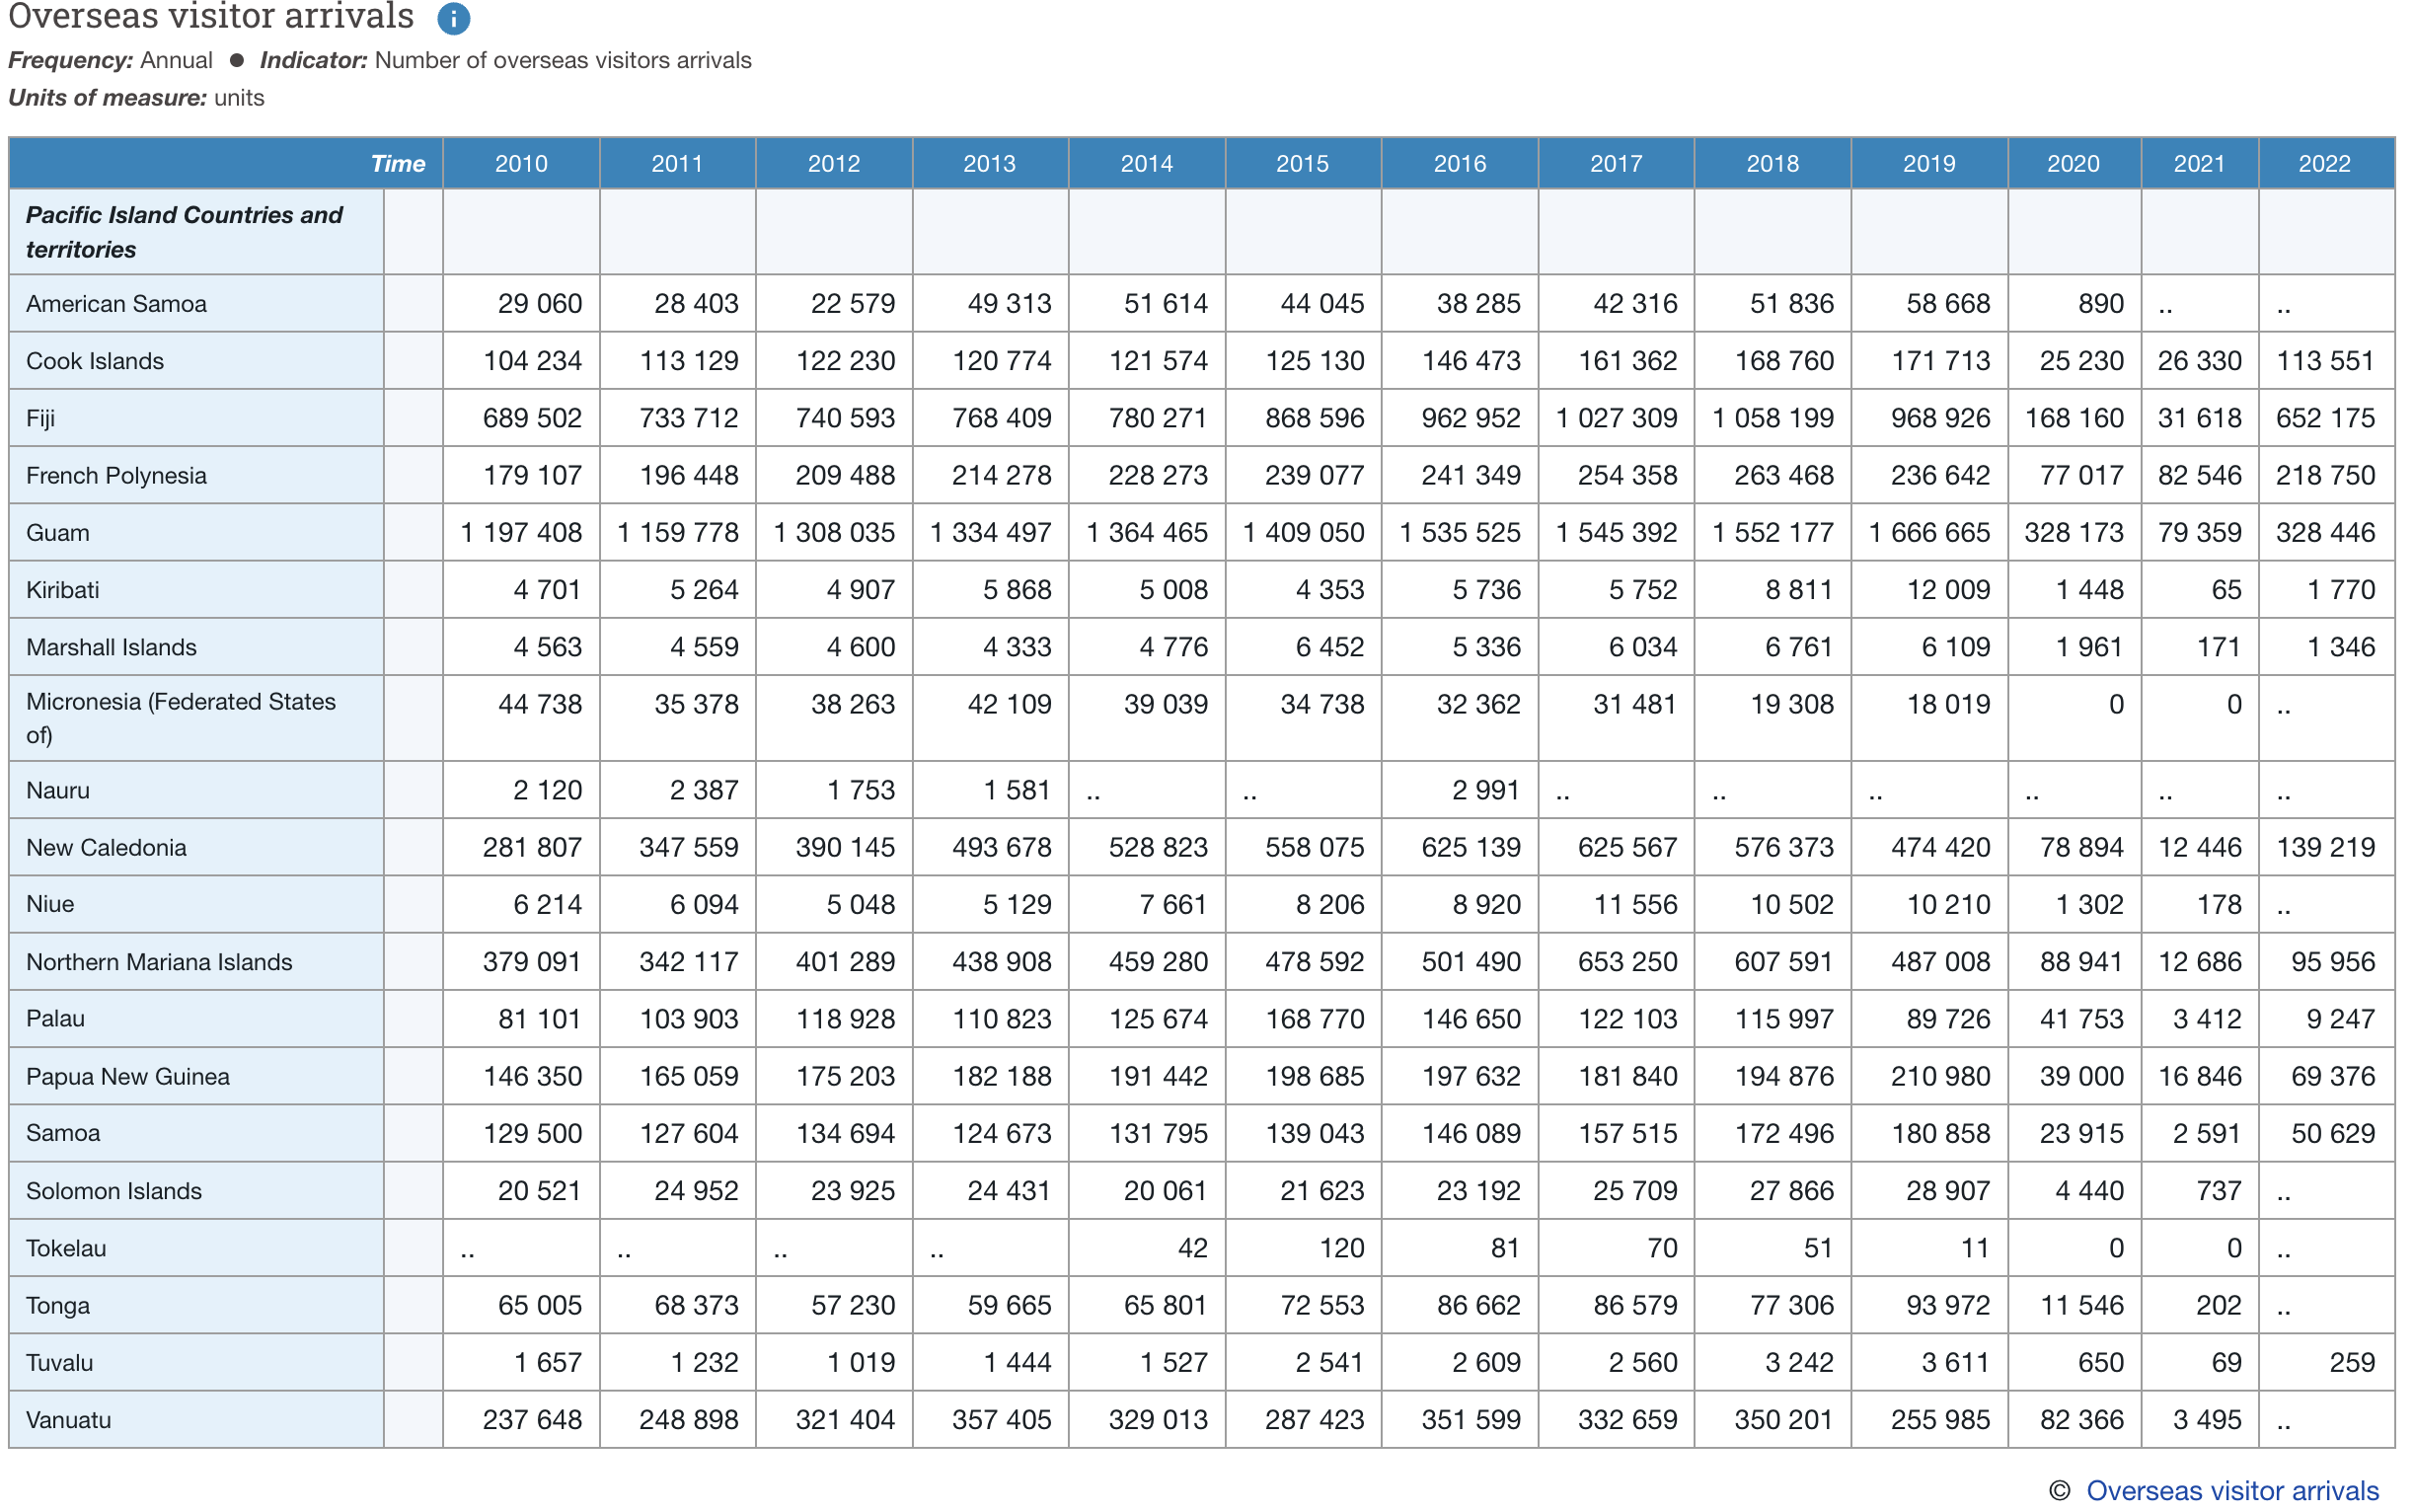

https://stats.pacificdata.org/vis?pg=10&snb=17&fs[0]=Topic%2C0%7CEconomy%23ECO%23&fc=Topic&bp=true&vw=tb&df[ds]=ds%3ASPC2&df[id]=DF_OVERSEAS_VISITORS&df[ag]=SPC&df[vs]=2.0&pd=2010%2C&dq=A.._T.NOSVA&ly[rw]=GEO_PICT&ly[cl]=TIME_PERIOD&to[TIME_PERIOD]=false

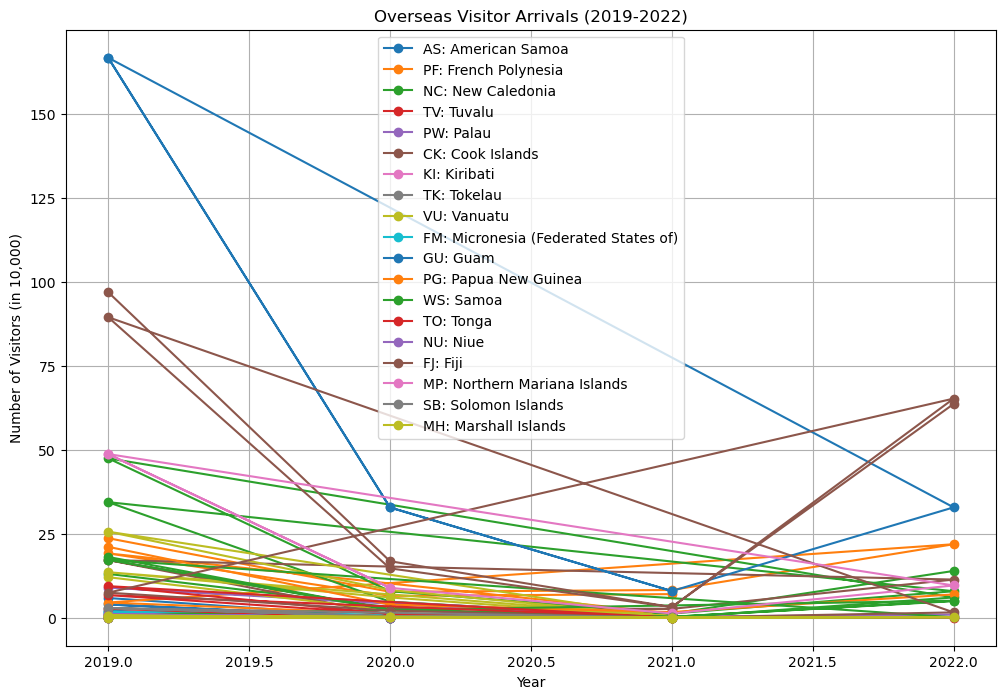

In [66]:
import matplotlib.pyplot as plt

# 
countries = filtered_df['GEO_PICT: Pacific Island Countries and territories'].unique()

# 
plt.figure(figsize=(12, 8))

# 
for country in countries:
    country_data = filtered_df[filtered_df['GEO_PICT: Pacific Island Countries and territories'] == country]
    obs_values_million = country_data['OBS_VALUE'] / 10000  # 将观测值转换为万人
    plt.plot(country_data['TIME_PERIOD: Time'], obs_values_million, marker='o', label=country)

# 
plt.title('Overseas Visitor Arrivals (2019-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Visitors (in 10,000)')
plt.legend()

# 
plt.grid(True)
plt.show()

